In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import pandas as pd

# Function to reduce memory usage of a DataFrame
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### Data Collection

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

train_df = pd.read_csv('dataset/train.csv')
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
songs_df = pd.read_csv('dataset/songs.csv')
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
members_df = pd.read_csv('dataset/members.csv')
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [6]:
song_extra_info_df = pd.read_csv('dataset/song_extra_info.csv')
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## Explanatory of Analysis

In [7]:
# determine the number of unique values in the 'msno' column, 'song_id' column, and the total number of rows in the 'train_df'
msno_unique_count = train_df['msno'].nunique()
song_id_unique_count = train_df['song_id'].nunique()
total_rows = train_df.shape[0]
msno_unique_count, song_id_unique_count, total_rows

(30755, 359966, 7377418)

In [8]:
common_song_ids_count = len(set(train_df['song_id'].unique()).intersection(set(songs_df['song_id'].unique())))
common_song_ids_count

359914

In [9]:
common_msnos_count = len(set(train_df['msno'].unique()).intersection(set(members_df['msno'].unique())))
common_msnos_count

30755

Conclusion :
1. Out Of 359966 song_ids we have only information of 359914 song_ids in train dataframe.
2. Out Of 30755 members we have all information of 30755 members in train dataframe.

In [10]:
# Merging df(train_df, songs_df, members_df, song_extra_info_df)
combined_df = pd.merge(pd.merge(train_df, songs_df, on='song_id', how='left'), members_df, on='msno', how='left')
combined_df = pd.merge(combined_df, song_extra_info_df, on='song_id', how='left')

In [11]:
# Reduce memory usage
combined_df = reduce_mem_usage(combined_df)

Memory usage of dataframe is 1125.70 MB
Memory usage after optimization is: 396.04 MB
Decreased by 64.8%


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   msno                    category
 1   song_id                 category
 2   source_system_tab       category
 3   source_screen_name      category
 4   source_type             category
 5   target                  int8    
 6   song_length             float32 
 7   genre_ids               category
 8   artist_name             category
 9   composer                category
 10  lyricist                category
 11  language                float16 
 12  city                    int8    
 13  bd                      int16   
 14  gender                  category
 15  registered_via          int8    
 16  registration_init_time  int32   
 17  expiration_date         int32   
 18  name                    category
 19  isrc                    category
dtypes: category(12), float16(1), float32(1), int16

In [13]:
combined_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005,Sleep Without You,QM3E21606003


In [14]:
combined_df.describe().astype('Float32')

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,7377418.0,7377304.0,7377268.0,7377418.0,7377418.0,7377418.0,7377418.0,7377418.0
mean,0.503517,245121.046875,<NA>,7.511399,17.53927,6.794068,20128104.0,20171566.0
std,0.499988,67344.710938,0.0,6.641624,21.55447,2.275774,30172.810547,3869.830811
min,0.0,1393.0,-1.0,1.0,-43.0,3.0,20040326.0,19700100.0
25%,0.0,214726.0,3.0,1.0,0.0,4.0,20110704.0,20170912.0
50%,1.0,241812.0,3.0,5.0,21.0,7.0,20131024.0,20170926.0
75%,1.0,272160.0,52.0,13.0,29.0,9.0,20151022.0,20171006.0
max,1.0,10851706.0,59.0,22.0,1051.0,13.0,20170132.0,20201016.0


POV: something irregular in the "bd" column which a maximun to 1051.0. It suggests that there might be outliers or erroneous data in that column. 

### Dealing with Null values

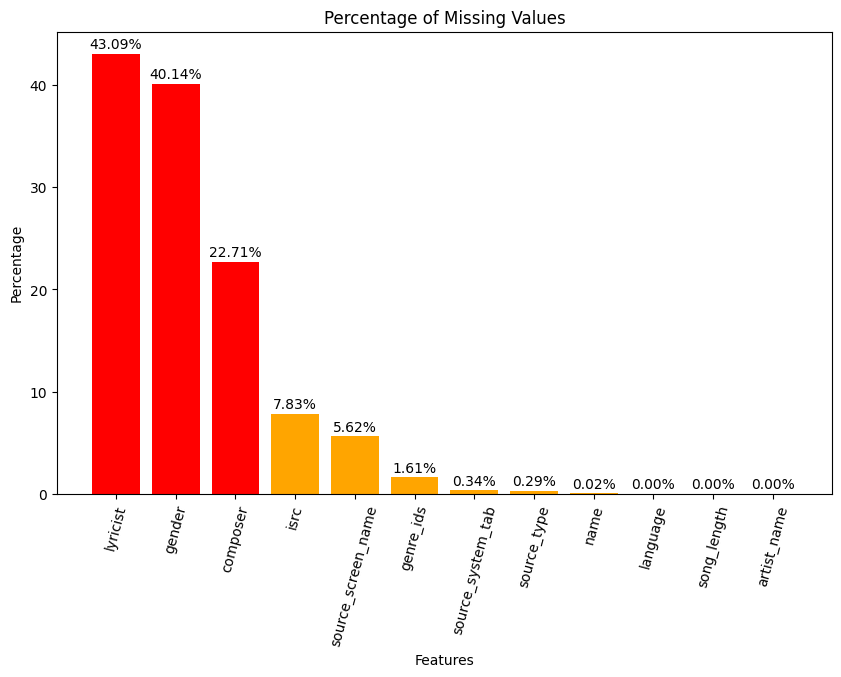

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate missing values
missing_values = combined_df.isnull().sum()[combined_df.isnull().sum() > 0].sort_values(ascending=False)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(combined_df)) * 100

# Create the bar chart
plt.bar(missing_percentage.index, missing_percentage.values, color='orange')

# Add count labels above the bars
for i, v in enumerate(missing_percentage):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')  # Use the percentage directly as the label

# Highlight columns with high missing values
highlight_columns = ["lyricist", "gender", "composer"]
for i, column in enumerate(missing_percentage.index):
    if column in highlight_columns:
        plt.bar(i, missing_percentage[column], color='red')

plt.title('Percentage of Missing Values')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=75)
plt.show()

POV: column lyricist, gender, composer are having high missing values rate. 

### Visualize of target variable

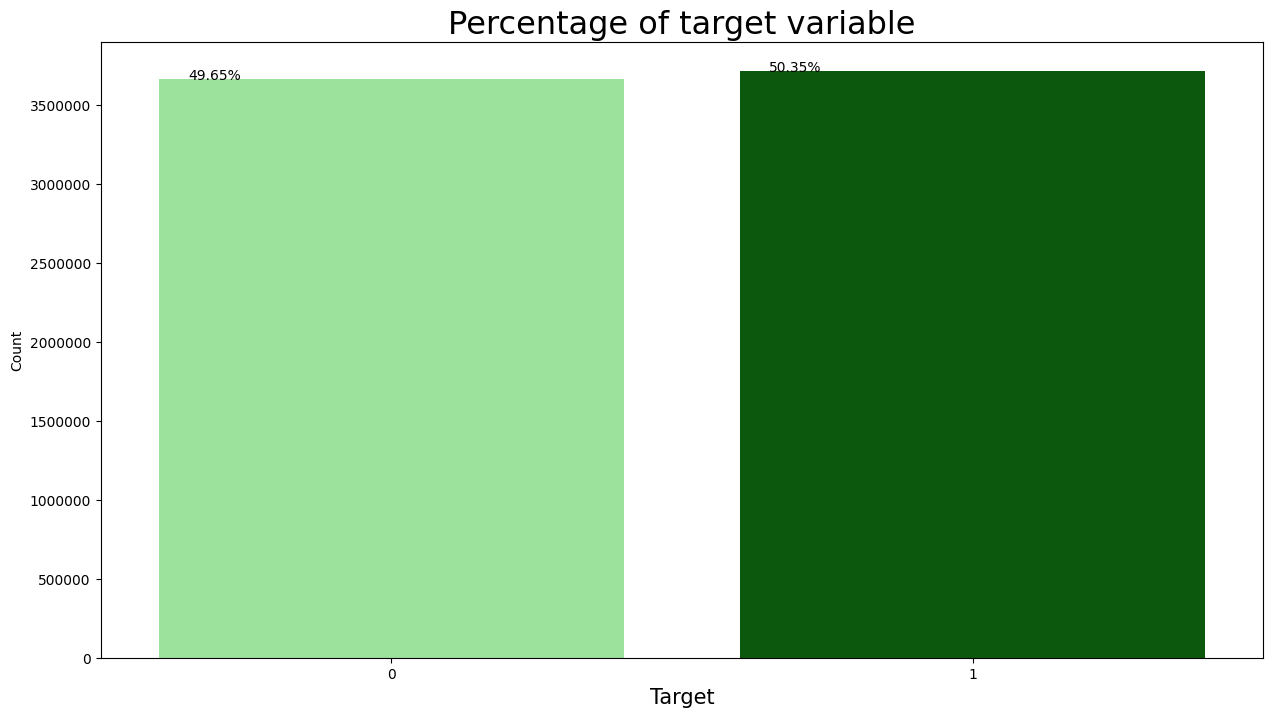

In [16]:
# Group by 'target' column and calculate the count
a = pd.DataFrame(combined_df.groupby('target').size().reset_index())

# Sort the values in descending order based on the count
a = a.sort_values(by=0, ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='target', y=0, data=a, palette=['lightgreen','darkgreen'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Count')
plt.title('Percentage of target variable', fontdict = {'fontsize': 23})

# Add percentage labels above each bar
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height() / combined_df.shape[0]), (p.get_x() + 0.05, p.get_height() + 0.5), fontsize=10)
plt.show()

"target": is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### Visualize of Gender column

In [17]:
a = combined_df['gender']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(combined_df.groupby('gender').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
plt.show()

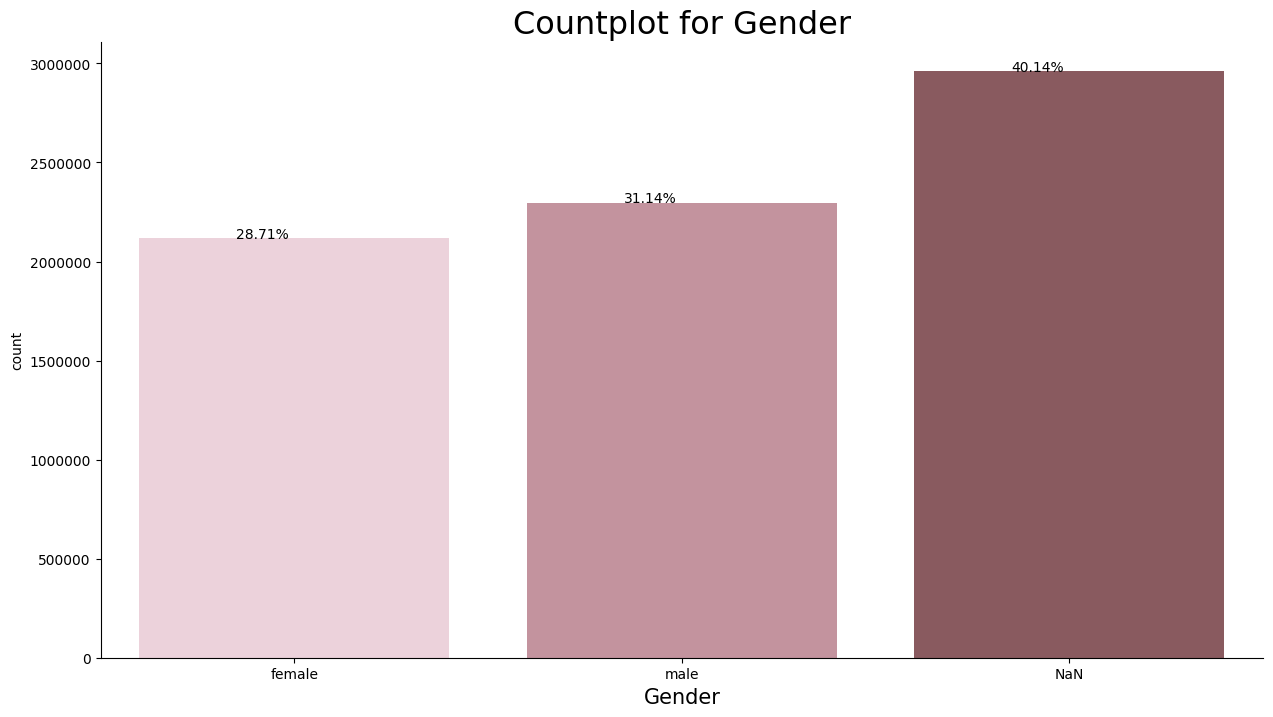

In [18]:
# Assuming 'gender' is a categorical variable in combined_df
combined_df['gender'] = combined_df['gender'].astype('category')

# Replace NaN values with 'NaN'
combined_df['gender'] = combined_df['gender'].cat.add_categories('NaN')
combined_df['gender'] = combined_df['gender'].fillna('NaN')

a = pd.DataFrame(combined_df.groupby('gender').size().reset_index())
a = a.sort_values(by=0, ascending=False)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='gender', y=0, data=a, palette='ch:1.0,-.1,dark=.4')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('count')
plt.title('Countplot for Gender', fontdict = {'fontsize': 23})

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height() / combined_df.shape[0]), (p.get_x() + 0.25, p.get_height() + 0.5), fontsize=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of genders of users.
- There are majority of missing values which known as 'NaN'.

### Visualize of Language column

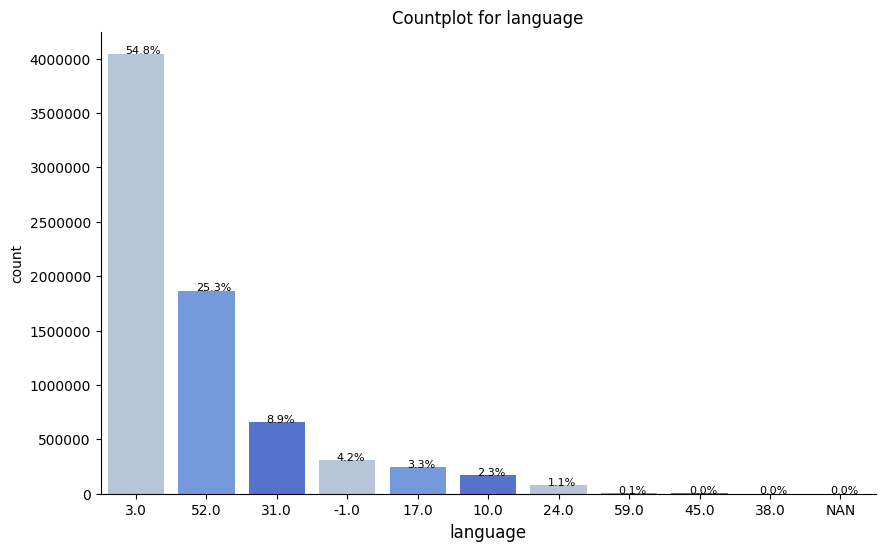

In [19]:
a = combined_df['language']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(combined_df.groupby('language').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x= 'language',y = 0, data = a, palette=['lightsteelblue','cornflowerblue','royalblue'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('language', fontsize=12)
plt.ylabel('count')
plt.title('Countplot for language')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of Language of songs most listened by users.
- 54.8% of users listened song language 3.0
- It can be concluded that language 3.0 is local language of that region/country where the app is used.

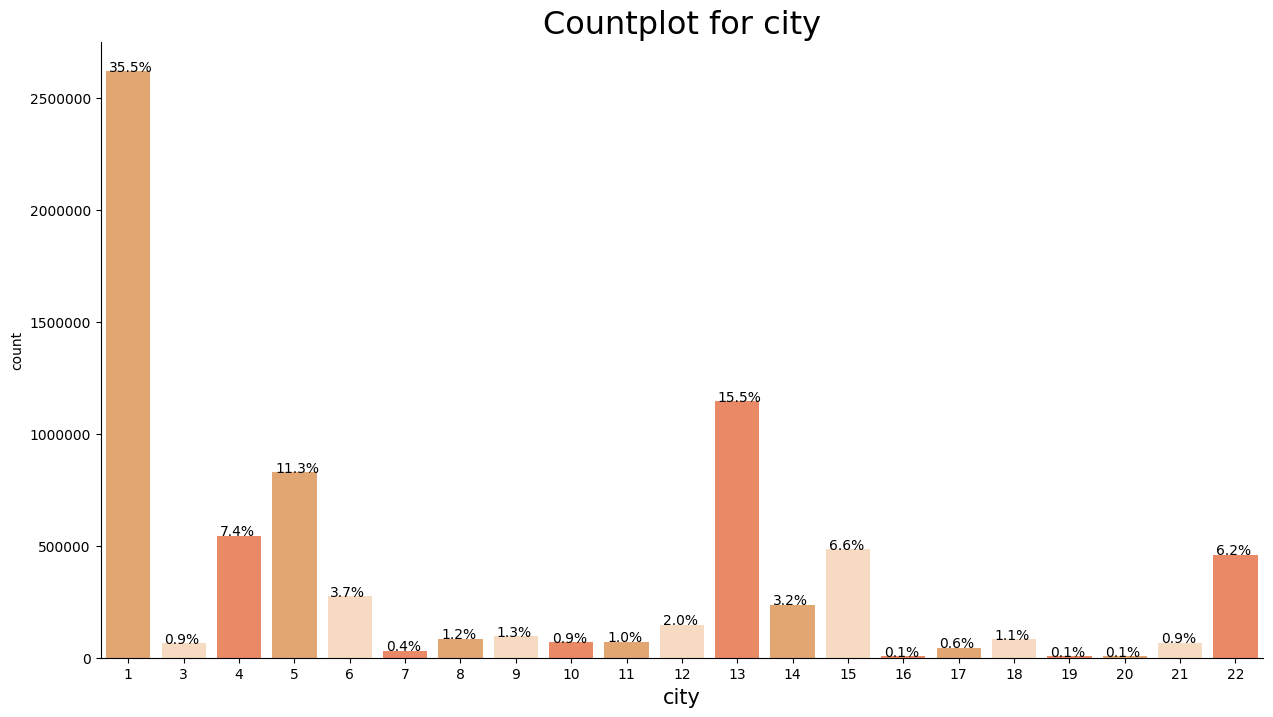

In [20]:
a = pd.DataFrame(combined_df.groupby('city').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, palette=['sandybrown','peachpuff','coral'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('city', fontsize=15)
plt.ylabel('count')
plt.title('Countplot for city', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of users according to cities.
- City 1,5 and 13 must be cities show high population as there are more users in city that using KKBox app.

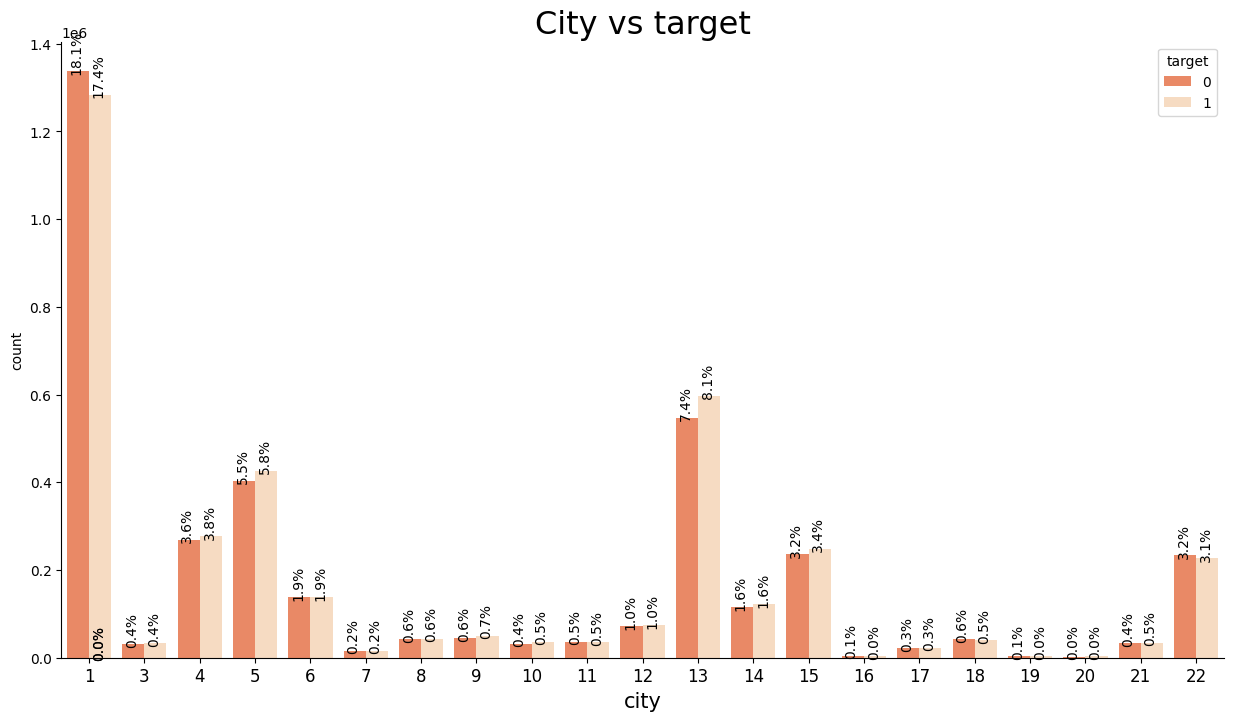

In [21]:
a = pd.DataFrame(combined_df.groupby(['city', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'target', palette=['coral','peachpuff'])
plt.xticks(fontsize = 12)
plt.xlabel('city', fontsize=15)
plt.ylabel('count')
plt.title('City vs target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10, rotation=90)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining  the distribution of target categories for each city.
- City 1, 5, and 13 has the high percentage of users using KKBox app. Additionally, the number of repeatedly listened to songs and not-repeatedly listened songs is relatively similar among its cities.

### Visualize of Artist Column

Aim: processes the 'artist_name' column by removing non-alphabetic characters, converting the text to lowercase, and selecting the first three words. It then creates a categorical representation of the processed artist names and replaces the original artist names in the DataFrame with their categorical codes.

In [22]:
import re
combined_df['artist_name_processed'] = combined_df['artist_name'].astype(str).apply(lambda x: ' '.join(re.sub('[^a-zA-Z ]',' ', x).lower().split()[:3]))
obj = combined_df['artist_name_processed'].astype('category').cat
artist_map = dict(enumerate(obj.categories))
combined_df['artist_name_processed'] = obj.codes

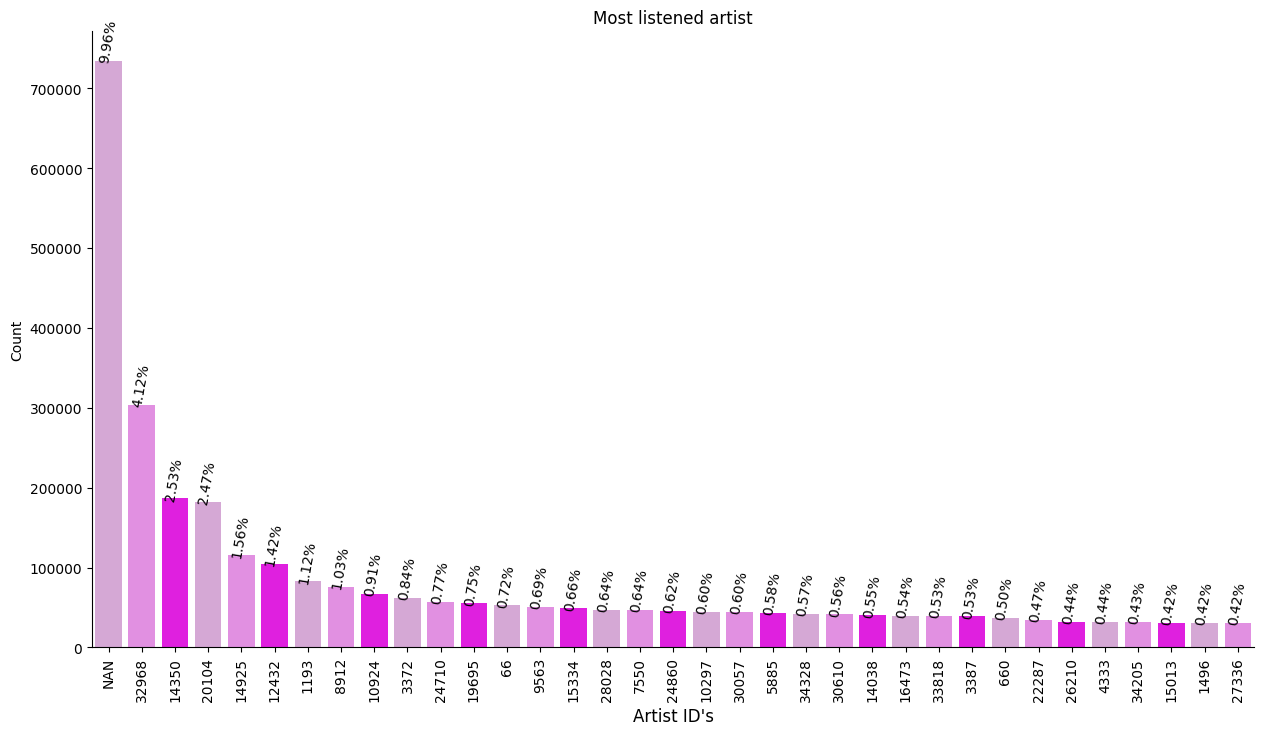

In [23]:
a = pd.DataFrame(combined_df.groupby('artist_name_processed').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:35, :]
a.replace(0, 'NAN', inplace = True)
plt.figure(figsize = (15, 8))
ax = sns.barplot(x= 'artist_name_processed',y = 0, data = a, palette=['plum','violet','fuchsia'])
plt.xticks(rotation= 90)
plt.xlabel('Artist ID\'s', fontsize = 12)
plt.ylabel('Count')
plt.title('Most listened artist')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), rotation=80, fontsize=10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [24]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Artist ID", "Artist Name", "Artist  ID ", "Artist  Name"]) 
a = np.array(a)
for i in range(1, a.shape[0], 2):
    myTable.add_row([a[i][0], artist_map[a[i][0]], a[i+1][0], artist_map[a[i+1][0]]]) 
print(myTable)

+-----------+------------------+-------------+--------------+
| Artist ID |   Artist Name    | Artist  ID  | Artist  Name |
+-----------+------------------+-------------+--------------+
|   32968   | various artists  |    14350    |   jay chou   |
|   20104   |      mayday      |    14925    |    jj lin    |
|   12432   |       hebe       |     1193    |     amei     |
|    8912   |    eason chan    |    10924    |    g e m     |
|    3372   |     bigbang      |    24710    |   r chord    |
|   19695   |      maroon      |      66     |    a lin     |
|    9563   |       eric       |    15334    |  jolin tsai  |
|   28028   |    sodagreen     |     7550    |    della     |
|   24860   |   rainie yang    |    10297    |  fish leong  |
|   30057   | the chainsmokers |     5885    |  claire kuo  |
|   34328   |     yoga lin     |    30610    | the last day |
|   14038   |    jam hsiao     |    16473    |   kenji wu   |
|   33818   |   william wei    |     3387    |     bii      |
|    660

POV: base on the above table we can assume that:
- There are 10% of missing value in the column 'artist name'
- There are 4.1% of unknown artist with the label 'various artists'
- 'jay chou', 'mayday', 'jj lin' are the most popular artist among all.

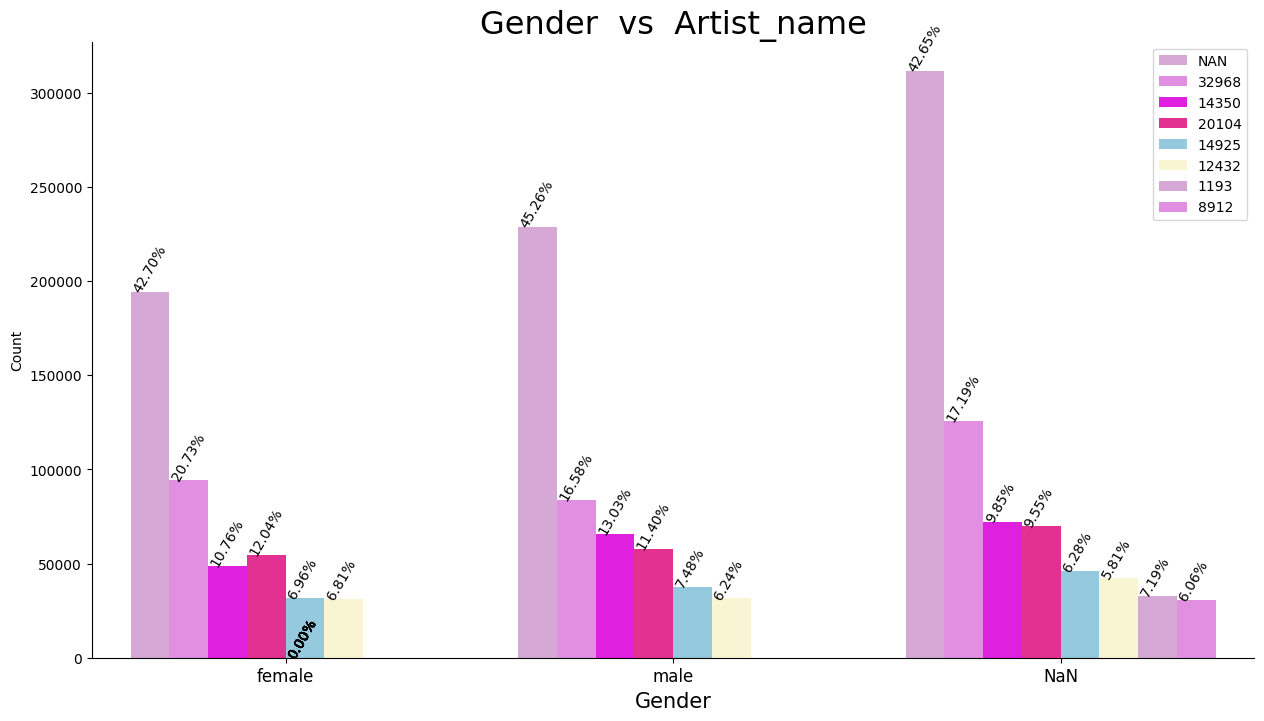

In [25]:
a = pd.DataFrame(combined_df.groupby(['gender', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:20, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('gender')[0].sum().reset_index())
plt.figure(figsize = (15, 8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'gender', palette=['plum','violet','fuchsia','deeppink','skyblue','lemonchiffon'])
plt.xticks( fontsize = 12)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count')
plt.title('Gender  vs  Artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.2f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x(), p.get_height()+0.5), fontsize = 10, rotation=60)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: base on the above plot we can assume that:
- There are high rate of missing value in the 'artist_name' column
- The percentage of users that listened to the 'various artist' are in high rate among all genders.
- 'jay chou': is more popular in males(13.03%) than females(10.76%).
- 'mayday': is more popular in females(12.04%) than males(11.40%).
- 'jj lin': is more popular in males(7.48%) than females(6.96%).
- 'hebe': is more popular in females(6.81%) than males(6.24%).

### Visualize of System Tab Column

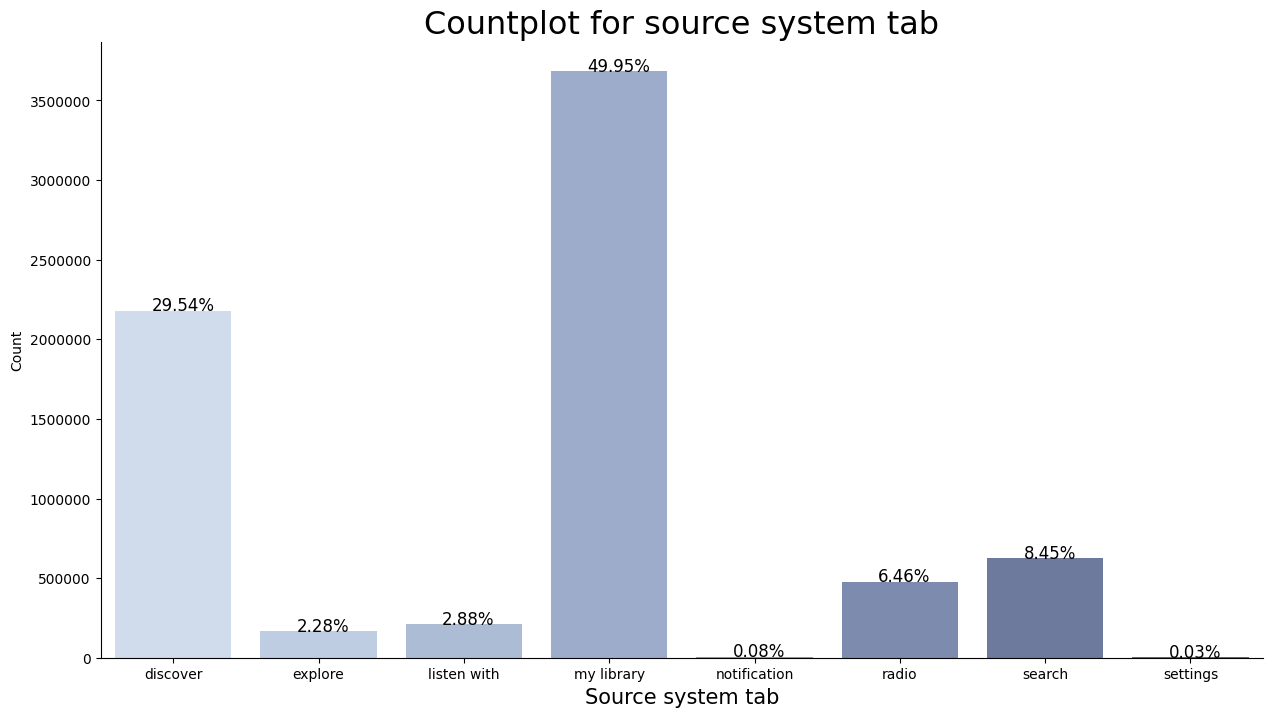

In [26]:
a = pd.DataFrame(combined_df.groupby('source_system_tab').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15, 8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a, palette='ch:30.0,-.10,dark=.4')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Source system tab', fontsize=15)
plt.ylabel('Count')
plt.title('Countplot for source system tab', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.2f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

*** source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.***

POV: Determining the distribution of Source system tab used by users in KKBox app while listening songs. We can assume that:
- There are majority of users using KKBox app by using local storage 'my library'(49.95%).
- Peoples also discover songs using discover, search then they try to use 'my library' for playing songs.

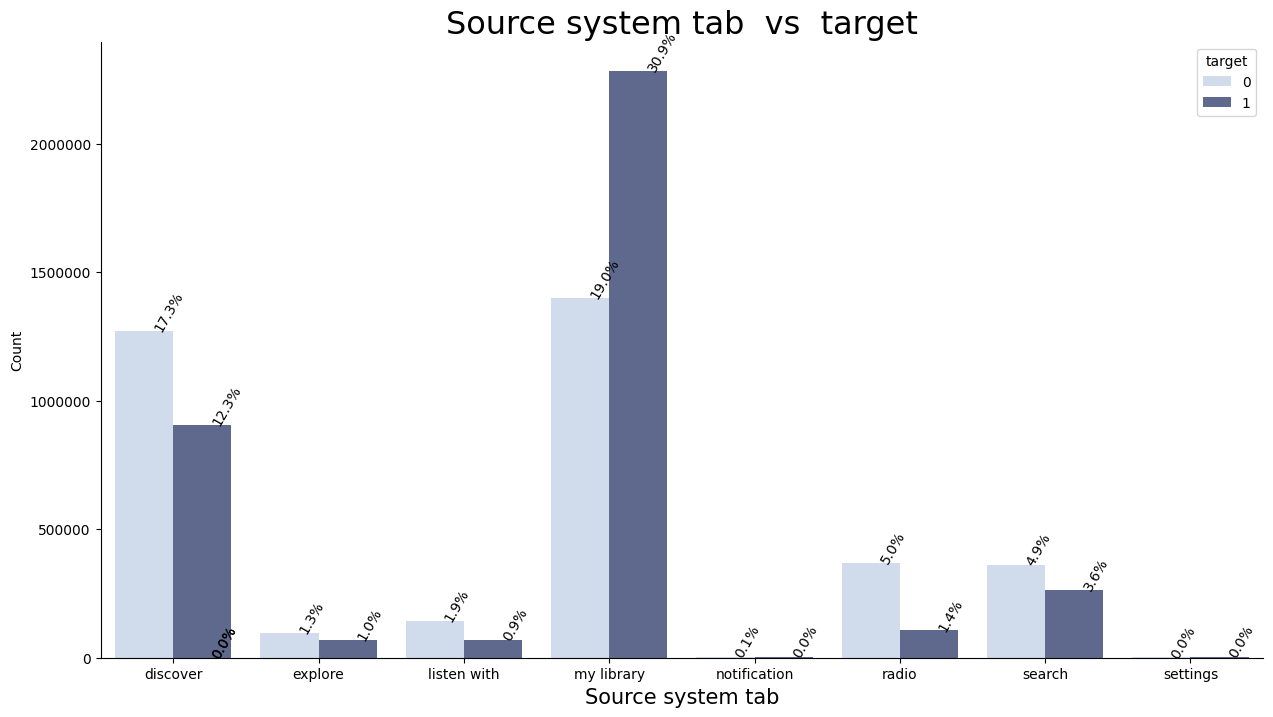

In [27]:
a = pd.DataFrame(combined_df.groupby(['source_system_tab', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a, hue = 'target', palette='ch:30.0,-.10,dark=.4')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Source system tab', fontsize=15)
plt.ylabel('Count')
plt.title('Source system tab  vs  target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10, rotation=60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


POV: Determining the distribution of Source system tab used by users in KKBox app while listening songs with respect to variation in target variable.
- 30.9% of users listening songs repeatedly from my library.
- 17.3% of users discovered songs where not listend more than once.

### Visualize of Source type Column

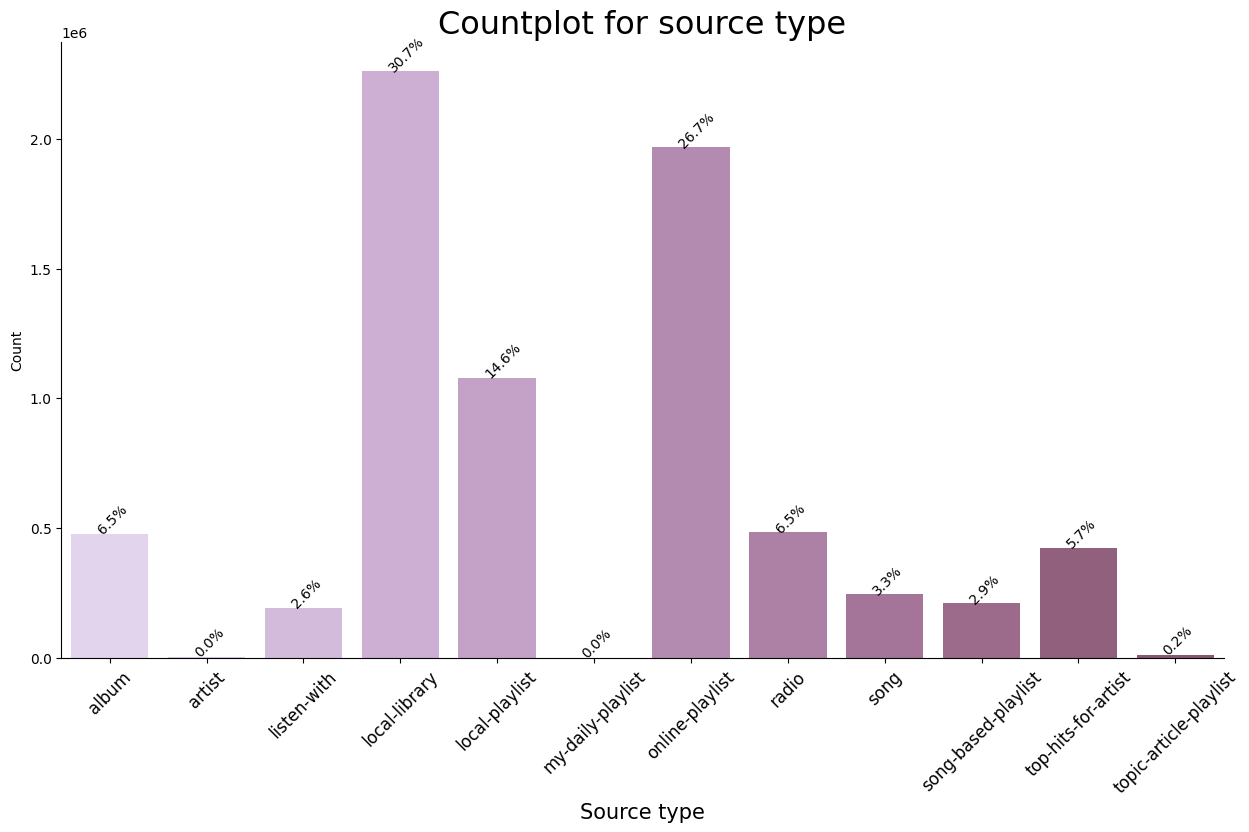

In [28]:
a = pd.DataFrame(combined_df.groupby('source_type').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a, palette='ch:4.0,-.30,dark=.4')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Source type', fontsize = 15)
plt.ylabel('Count')
plt.title('Countplot for source type', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10, rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of Source type used by users in KKBox app while listening songs.
- There are high percentage in local-library, online-playlist and local-playlist so meaning that there are majority of users that are using app via these source types.

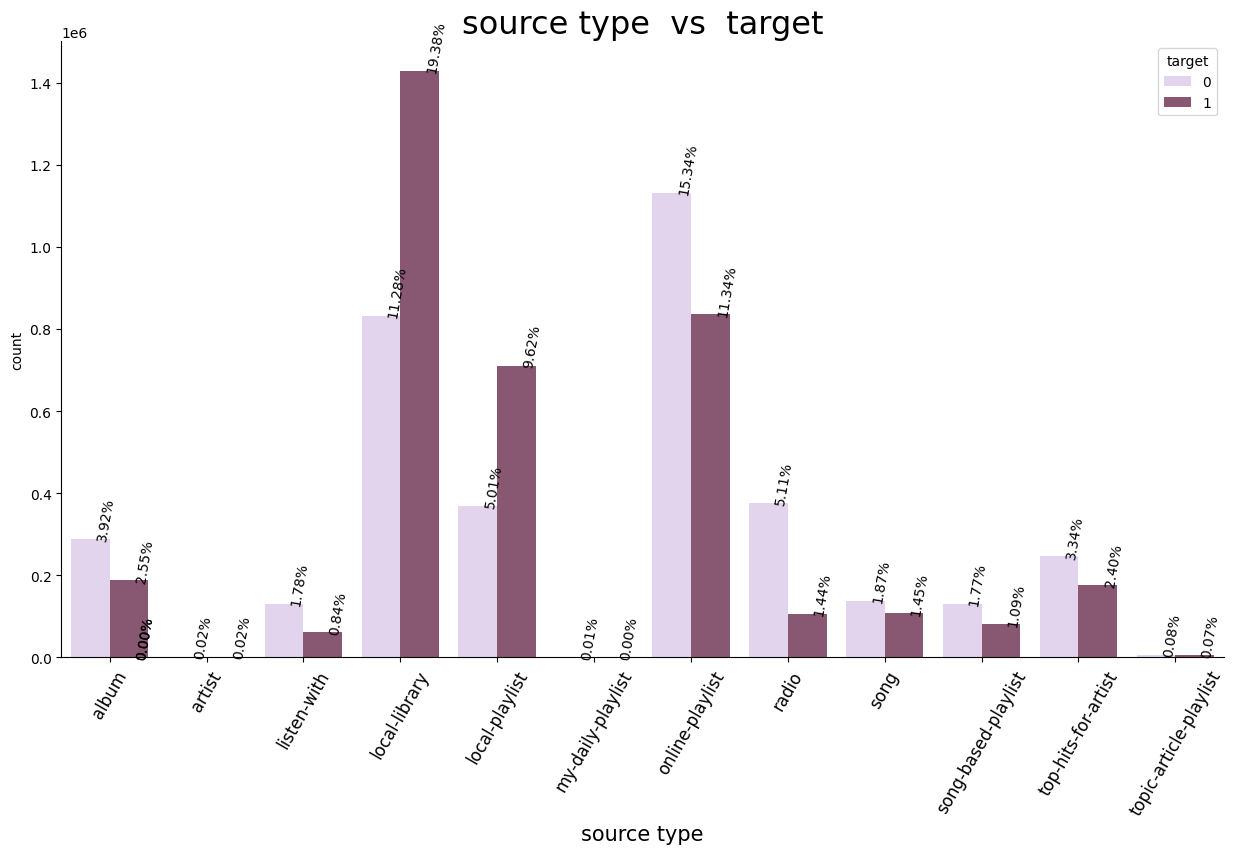

In [29]:
a = pd.DataFrame(combined_df.groupby(['source_type', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a, hue = 'target', palette='ch:4.0,-.30,dark=.4')
plt.xticks(rotation = 60, fontsize = 12)
plt.xlabel('source type', fontsize=15)
plt.ylabel('count')
plt.title('source type  vs  target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.2f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10, rotation=80)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of Source type used by users in KKBox app while listening songs with respect to variation in target variable.
- There is 19.38% of users listening songs repeatedly from Local library.
- There is 15.34% of users not listening songs repeatedly from online-playlist.

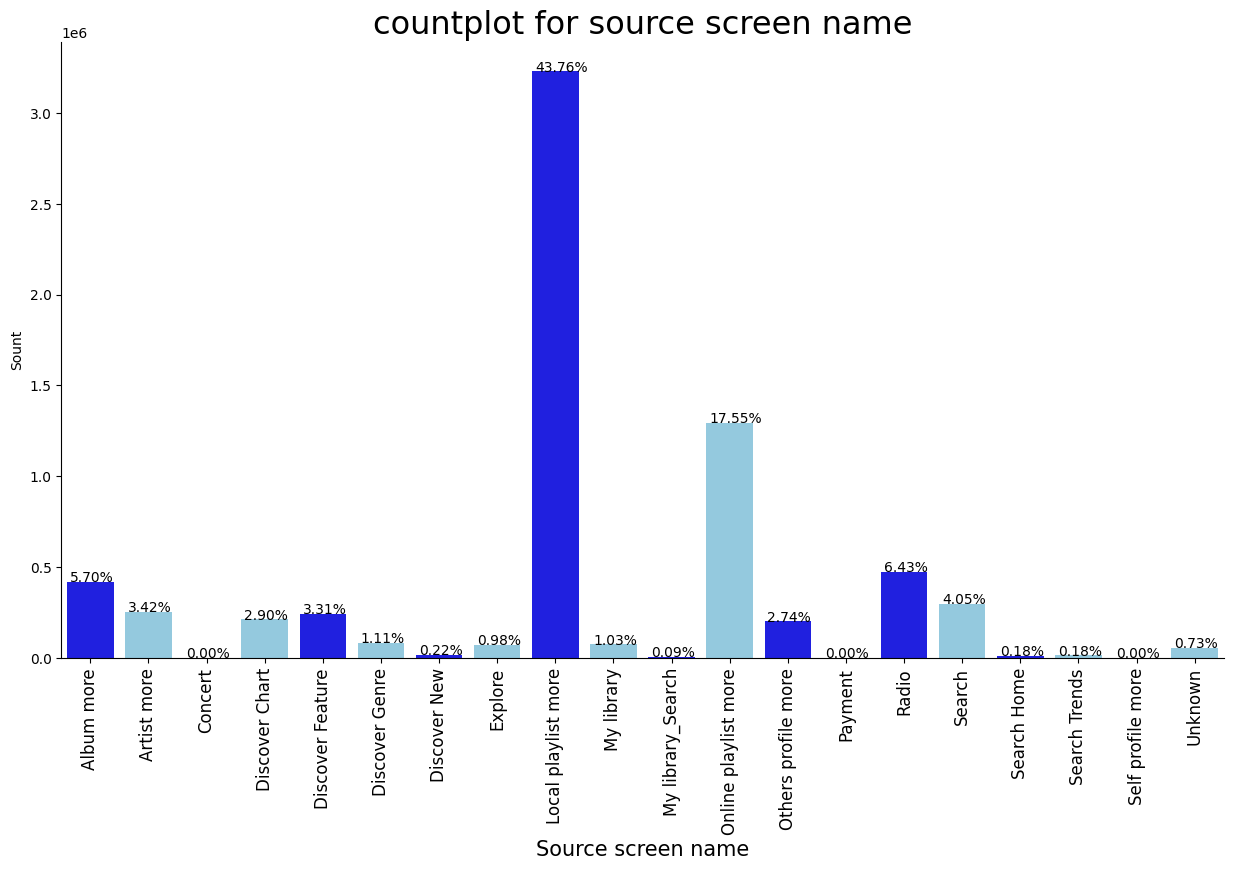

In [30]:
a = pd.DataFrame(combined_df.groupby('source_screen_name').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, data = a, palette=['blue','skyblue'])
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Source screen name', fontdict = {'fontsize':15})
plt.ylabel('Sount')
plt.title('countplot for source screen name', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.2f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

source_screen_name: name of layout users see. 
POV: Determining the distribution of Source screen name used by users in KKBox app while listening songs.
- There are 43.76% of the users are using local playlist for playing songs.

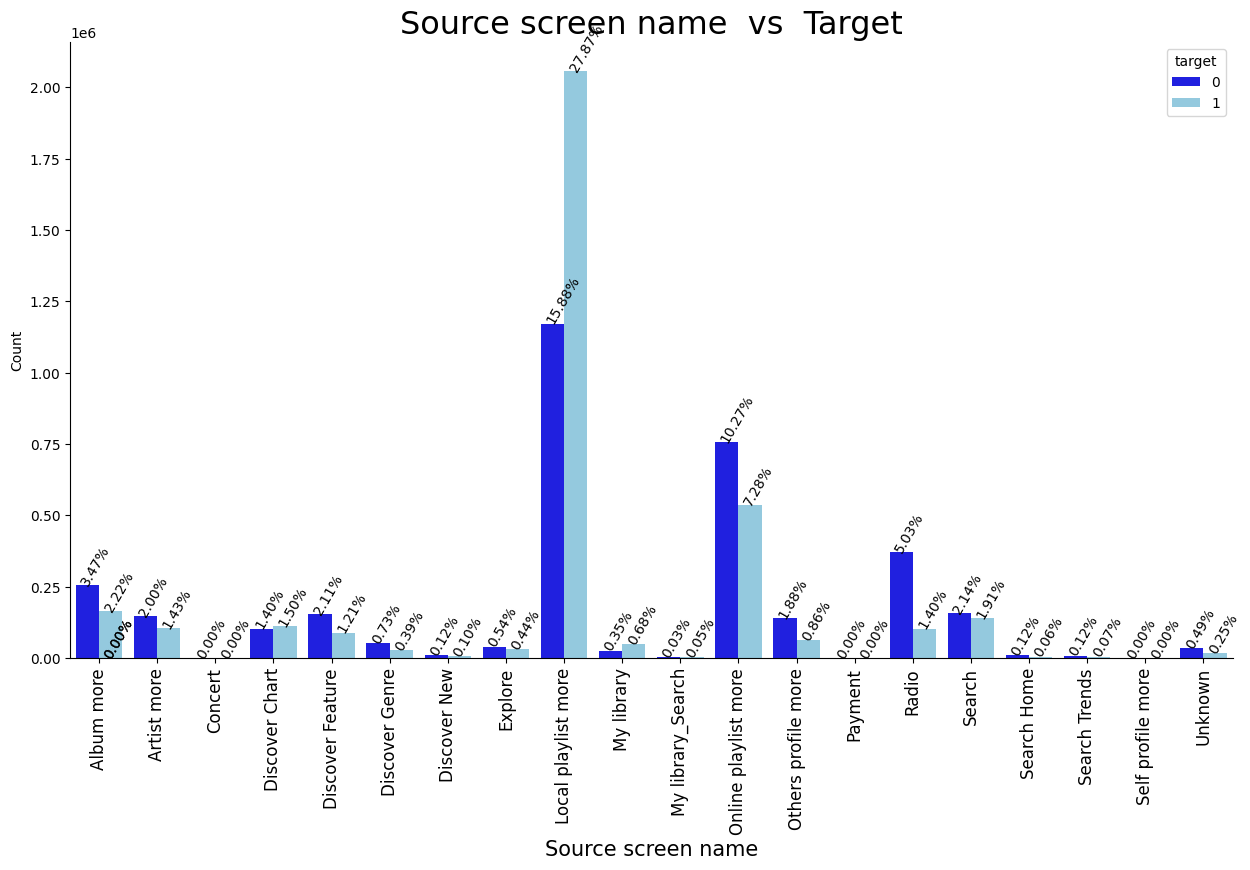

In [31]:
a = pd.DataFrame(combined_df.groupby(['source_screen_name', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, hue = 'target', data = a, palette=['blue','skyblue'])
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Source screen name', fontdict = {'fontsize':15})
plt.ylabel('Count')
plt.title('Source screen name  vs  Target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.2f}%'.format( 100*p.get_height()/combined_df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10, rotation=60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

POV: Determining the distribution of Source screen name used by users in KKBox app while listening songs with respect to variation in target variable.
- There is a high percenage 27.9% of users listening songs repeatedly from Local Playlist.
- Also, 5.0% of users Listening songs from radio where not listend more than once.